In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import json

In [2]:
with h5py.File("../../../data/evaluate_synaptic_weight_computation_backup2.h5", "r") as f:
    solver_modes = json.loads(f.attrs["solver_modes"])
    modes = json.loads(f.attrs["modes"])
    qs = json.loads(f.attrs["qs"])
    neurons = json.loads(f.attrs["neurons"])
    xs_sigma_test = json.loads(f.attrs["xs_sigma_test"])
    errs_tuning = f["errs_tuning"][()]
    errs_delays = f["errs_delay"][()]

In [8]:
errs_delays.shape
# N_SOLVER_MODES, N_MODES, N_QS, N_NEURONS, N_REPEAT,
# N_XS_SIGMA_TEST, N_REPEAT_TEST, N_DELAYS_TEST

(3, 4, 3, 5, 5, 1, 2, 10)

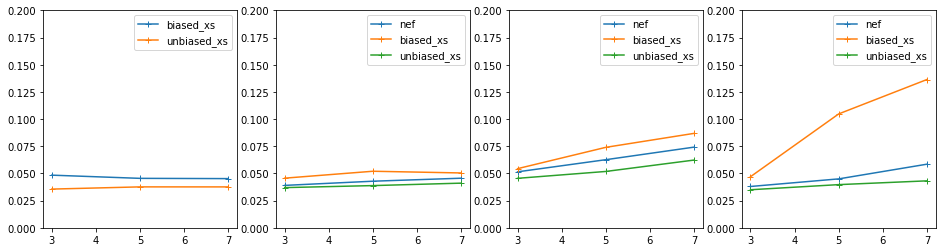

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(16.0, 4.0))
for i, solver_mode in enumerate(solver_modes):
    for j, mode in enumerate(modes):
        if solver_mode == "nef" and mode == "non_lindep_cosine":
            continue
        Es = errs_tuning[i, j, :, 4, :, 0].reshape(len(qs), -1)
        axs[j].plot(qs, np.median(Es, axis=1), '+-', label=solver_mode)
        axs[j].legend()
        axs[j].set_ylim(0, 0.2)

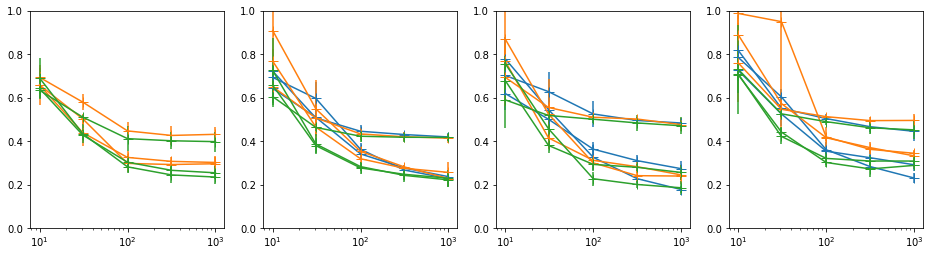

In [41]:
colors = ['tab:blue', 'tab:orange', 'tab:green']
fig, axs = plt.subplots(1, 4, figsize=(16.0, 4.0))
for i, solver_mode in enumerate(solver_modes):
    for j, mode in enumerate(modes):
        if solver_mode == "nef" and mode == "non_lindep_cosine":
            continue
        for k, q in enumerate(qs):
#            if q != 7:
#                continue
            Es = errs_delays[i, j, k, :, :, 0, :, :]
            Es = np.mean(Es, axis=-1) # Compute the mean delay error
            Es = Es.reshape(len(neurons), -1)
            E25 = np.percentile(Es, 25, axis=1)
            E50 = np.percentile(Es, 50, axis=1)
            E75 = np.percentile(Es, 75, axis=1)
            color = colors[i]
            axs[j].errorbar(neurons, E50, (E75 - E50), (E50 - E25), '-+', markersize=10, color=colors[i])        #axs[j].legend()
        axs[j].set_ylim(0, 1)
        axs[j].set_xscale('log')

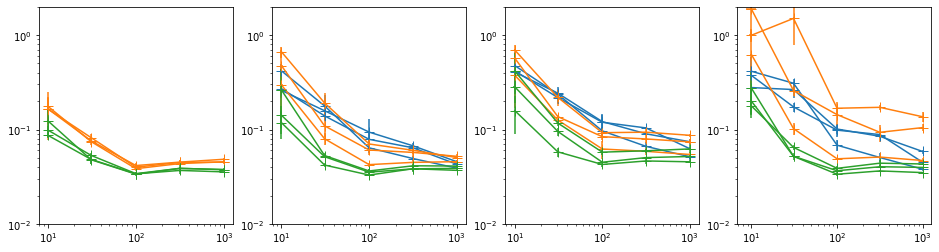

In [40]:
colors = ['tab:blue', 'tab:orange', 'tab:green']
fig, axs = plt.subplots(1, 4, figsize=(16.0, 4.0))
for i, solver_mode in enumerate(solver_modes):
    for j, mode in enumerate(modes):
        if solver_mode == "nef" and mode == "non_lindep_cosine":
            continue
        for k, q in enumerate(qs):
#            if q != 7:
#                continue
            Es = errs_tuning[i, j, k, :, :, 0, :]
            #Es = np.mean(Es, axis=-1) # Compute the mean delay error
            Es = Es.reshape(len(neurons), -1)
            E25 = np.percentile(Es, 25, axis=1)
            E50 = np.percentile(Es, 50, axis=1)
            E75 = np.percentile(Es, 75, axis=1)
            color = colors[i]
            axs[j].errorbar(neurons, E50, (E50 - E25), (E75 - E50), '-+', markersize=10, color=colors[i])        #axs[j].legend()
        axs[j].set_ylim(1e-2, 2)
        axs[j].set_xscale('log')
        axs[j].set_yscale('log')